<a href="https://colab.research.google.com/github/ryan840919/STAS-Detection/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Anaylize the False-Positive and False-Negative.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
import cv2
import numpy as np
import pandas as pd

## Statistics for false-positive with bigger region.
The function anaylize the false-positive images with 10 pixels bigger region in every direcition.
1. Height distribution
2. Width distribution
3. Probability distribution
4. BGR color distribution
5. BGR color distribution for all prediction results

In [ ]:
def Statistics_P_not_G_W(test_name):

  BW = []
  GW = []
  RW = []

  filename = os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels')
  numlist = []
  for fil in filename:
    name = fil.split('.')
    numlist.append(int(name[0]))

  for num in numlist:
    img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/images/val/{num:08}.jpg')
    # open and read the labels.txt files generated by the recent test.
    with open(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels/{num:08}.txt','r') as R:
      corlis = []
      for line in R.readlines():
        word = line.split(' ')
        xmin = round(float(word[1])*1716-float(word[3])*1716/2)
        ymin = round(float(word[2])*942-float(word[4])*942/2)
        xmax = round(float(word[1])*1716+float(word[3])*1716/2)
        ymax = round(float(word[2])*942+float(word[4])*942/2)
        BW.append(img[ymin:ymax,xmin:xmax,0].tolist())
        GW.append(img[ymin:ymax,xmin:xmax,1].tolist())
        RW.append(img[ymin:ymax,xmin:xmax,2].tolist())

  BW = [items for item in BW for items in item]
  BW = [items for item in BW for items in item]
  GW = [items for item in GW for items in item]
  GW = [items for item in GW for items in item]
  RW = [items for item in RW for items in item]
  RW = [items for item in RW for items in item]

  

  H = []
  W = []
  S = []
  B = []
  G = []
  R = []

  number = len(os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G'))

  for i in os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G'):
    if i.split('.')[1] == 'jpg':
      img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{i}')
      H.append(img.shape[0])
      W.append(img.shape[1])
      B.append(img[:,:,0].tolist())
      G.append(img[:,:,1].tolist())
      R.append(img[:,:,2].tolist())
    if i.split('.')[1] == 'txt':
      with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{i}') as s:
        score = s.read()
        S.append(score)

  B = [items for item in B for items in item]
  B = [items for item in B for items in item]
  G = [items for item in G for items in item]
  G = [items for item in G for items in item]
  R = [items for item in R for items in item]
  R = [items for item in R for items in item]

  print(f'The number of P_not_G is {number}')
  fig,axes = plt.subplots(3,3,figsize=(40,10)) 
  sns.histplot(ax = axes[0,0],x=H,discrete=True).set(title='Height')
  sns.histplot(ax = axes[0,1],x=W,discrete=True).set(title='Width')
  S.sort()
  sns.stripplot(ax = axes[0,2],data=S).set(title='Probability')
  sns.histplot(ax = axes[1,0],x=B,discrete=True).set(title='Biue')
  sns.histplot(ax = axes[1,1],x=G,discrete=True).set(title='Green')
  sns.histplot(ax = axes[1,2],x=R,discrete=True).set(title='Red')
  sns.histplot(ax = axes[2,0],x=BW,discrete=True).set(title='Biue_Whole')
  sns.histplot(ax = axes[2,1],x=GW,discrete=True).set(title='Green_Whole')
  sns.histplot(ax = axes[2,2],x=RW,discrete=True).set(title='Red_Whole')

The number of P_not_G is 106


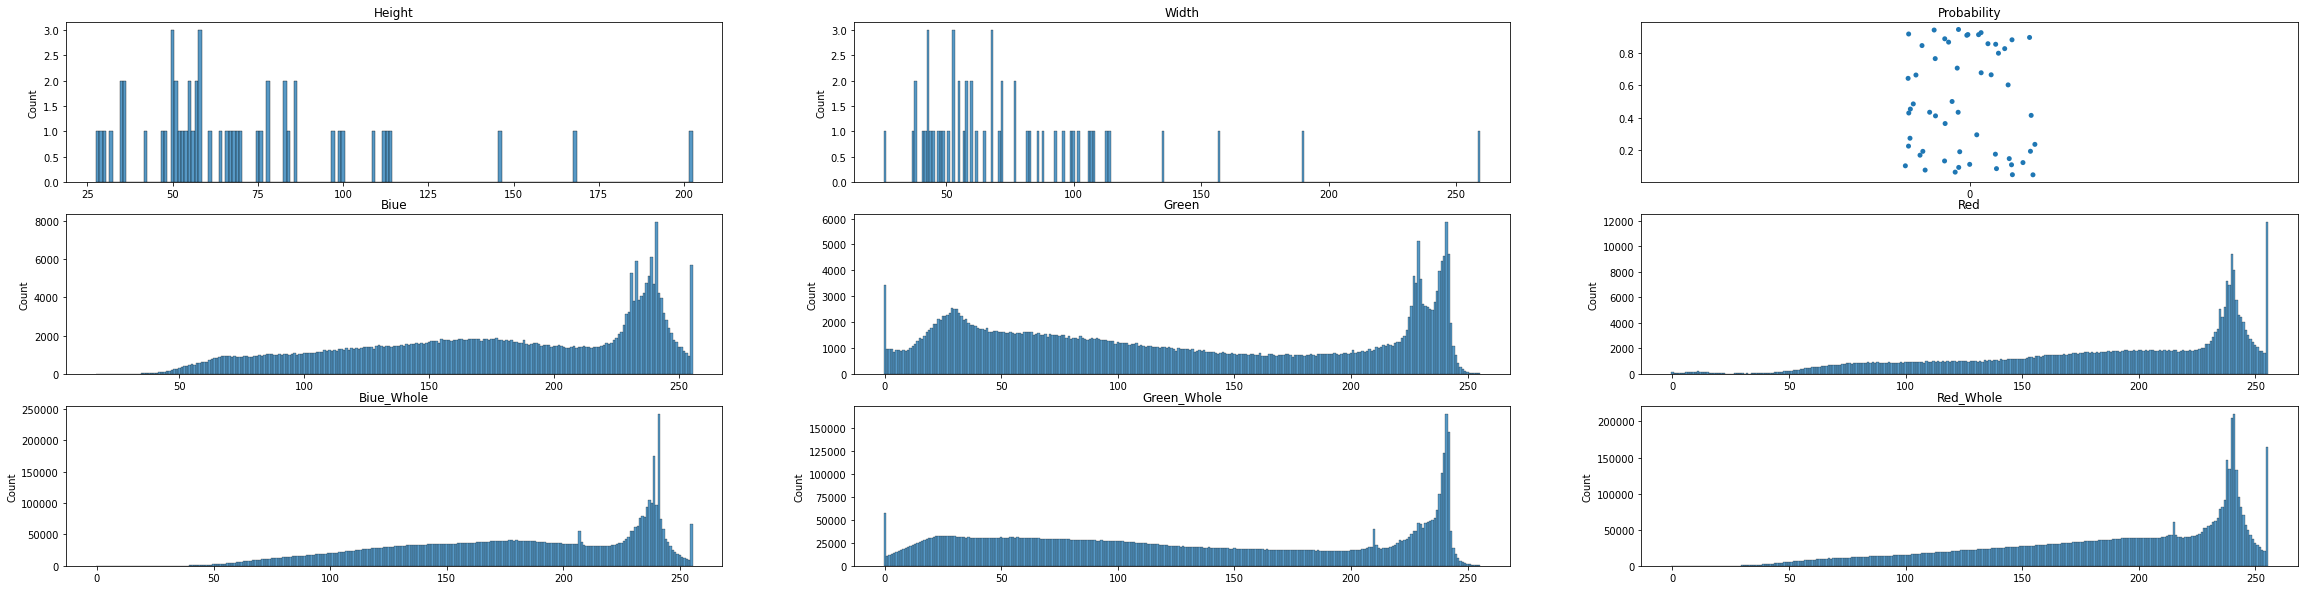

In [ ]:
Statistics_P_not_G_W('test_for_label')

The number of P_not_G is 142


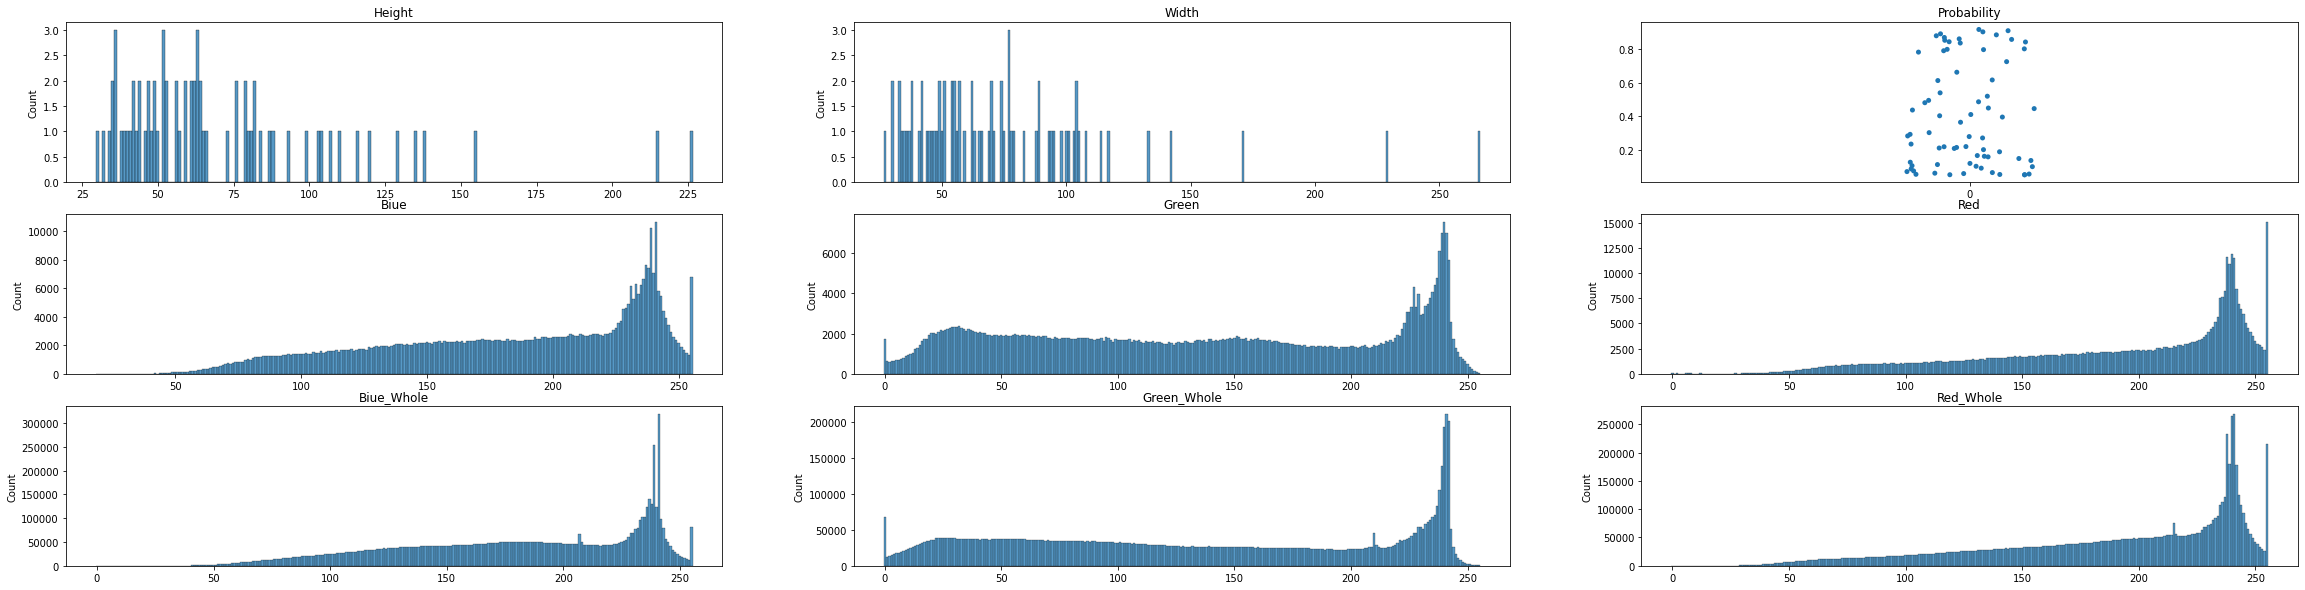

In [ ]:
Statistics_P_not_G_W('test_for_label_augmentation')

The number of P_not_G is 204


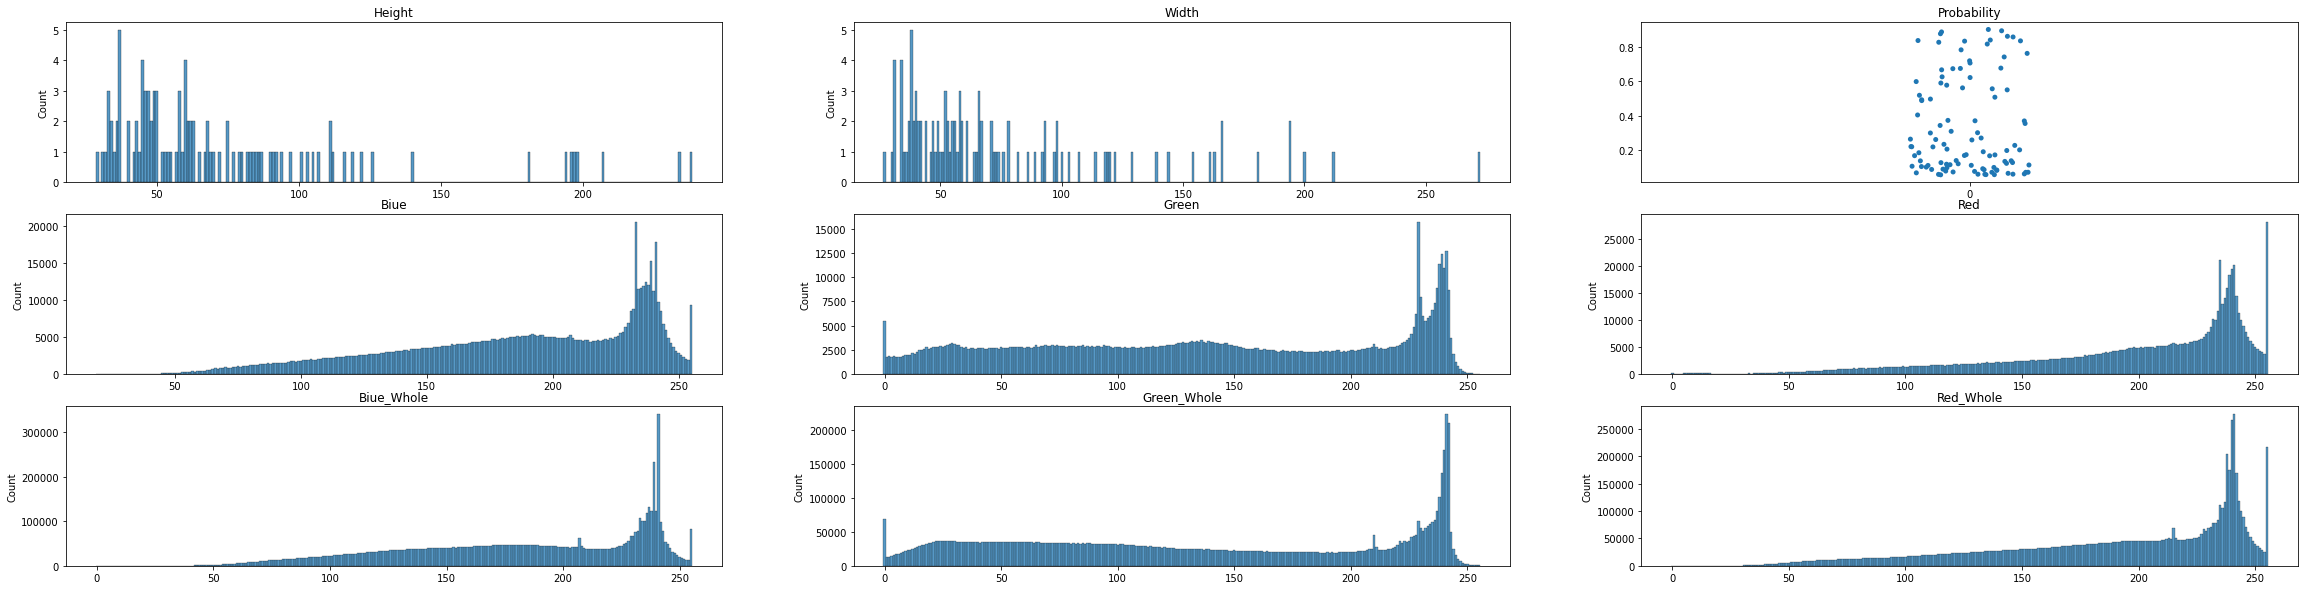

In [ ]:
Statistics_P_not_G_W('test_with_background')

The number of P_not_G is 224


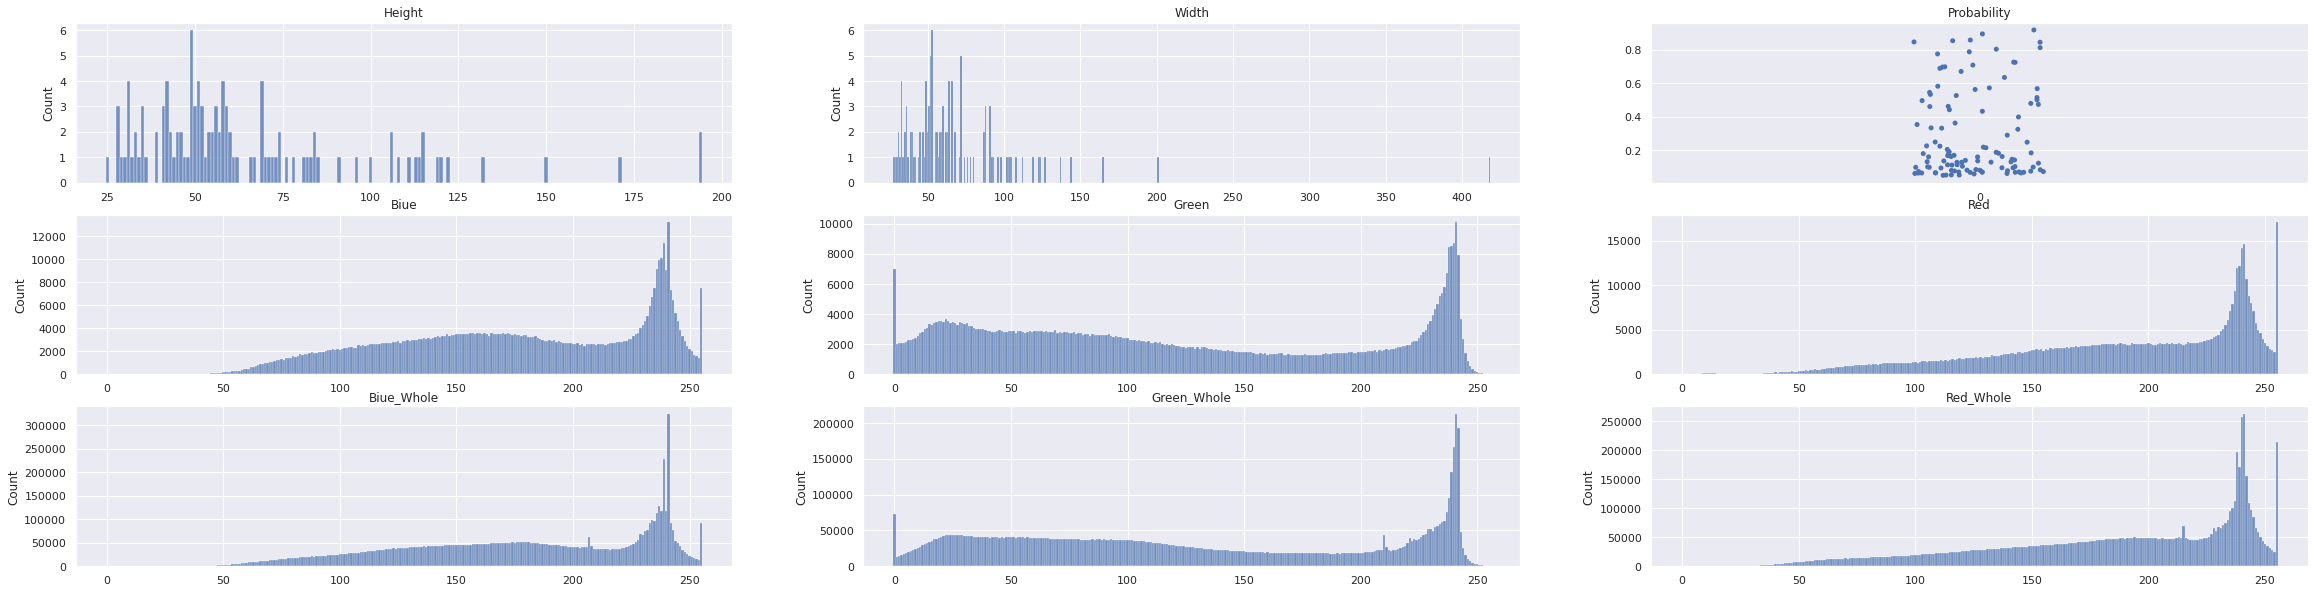

In [ ]:
Statistics_P_not_G_W('test_with_background_lr0')

## Statistics for false-positive with bigger region.
The function anaylize the false-positive images with 10 pixels bigger region in every direcition.
1. Height distribution
2. Width distribution
3. BGR color distribution

In [ ]:
def Statistics_P_not_G_bigger(test_name):
  H = []
  W = []
  S = []
  B = []
  G = []
  R = []

  num = len(os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G_bigger'))

  for i in os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G_bigger'):
    if i.split('.')[1] == 'jpg':
      img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G_bigger/{i}')
      H.append(img.shape[0])
      W.append(img.shape[1])
      B.append(img[:,:,0].tolist())
      G.append(img[:,:,1].tolist())
      R.append(img[:,:,2].tolist())
    if i.split('.')[1] == 'txt':
      with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G_bigger/{i}') as s:
        score = s.read()
        S.append(score)

  B = [items for item in B for items in item]
  B = [items for item in B for items in item]
  G = [items for item in G for items in item]
  G = [items for item in G for items in item]
  R = [items for item in R for items in item]
  R = [items for item in R for items in item]

  # print(f'The number of P_not_G is {num}')
  fig,axes = plt.subplots(2,3,figsize=(40,10)) 
  sns.histplot(ax = axes[0,0],x=H,discrete=True).set(title='Height')
  sns.histplot(ax = axes[0,1],x=W,discrete=True).set(title='Width')
  S.sort()
  # sns.stripplot(ax = axes[0,2],data=S).set(title='Probability')
  sns.histplot(ax = axes[1,0],x=B,discrete=True).set(title='Biue')
  sns.histplot(ax = axes[1,1],x=G,discrete=True).set(title='Green')
  sns.histplot(ax = axes[1,2],x=R,discrete=True).set(title='Red')

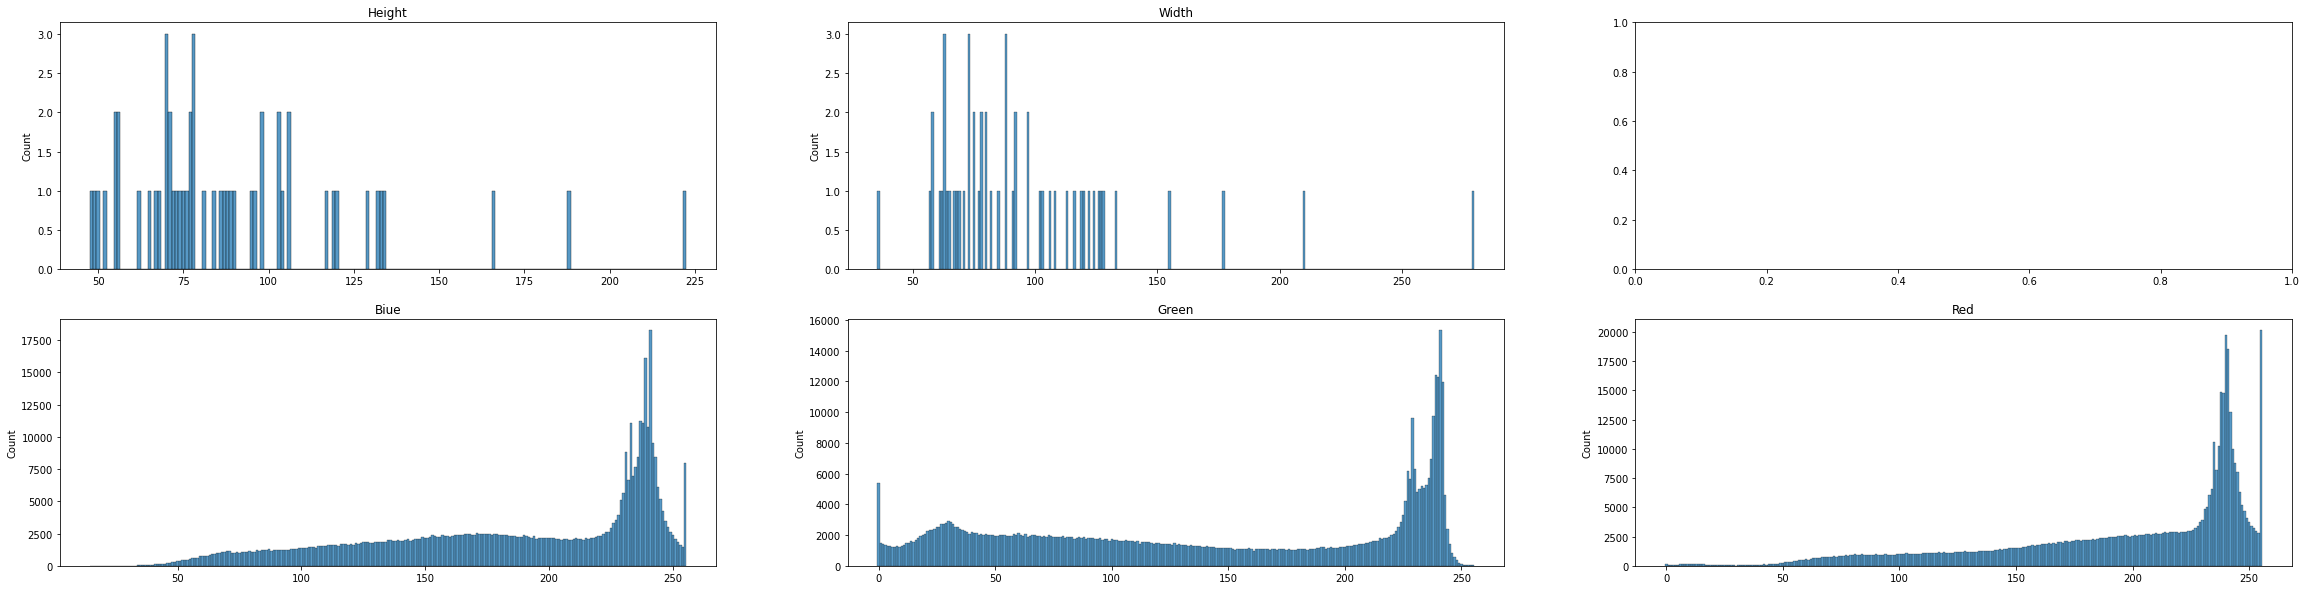

In [ ]:
Statistics_P_not_G_bigger('test_for_label')

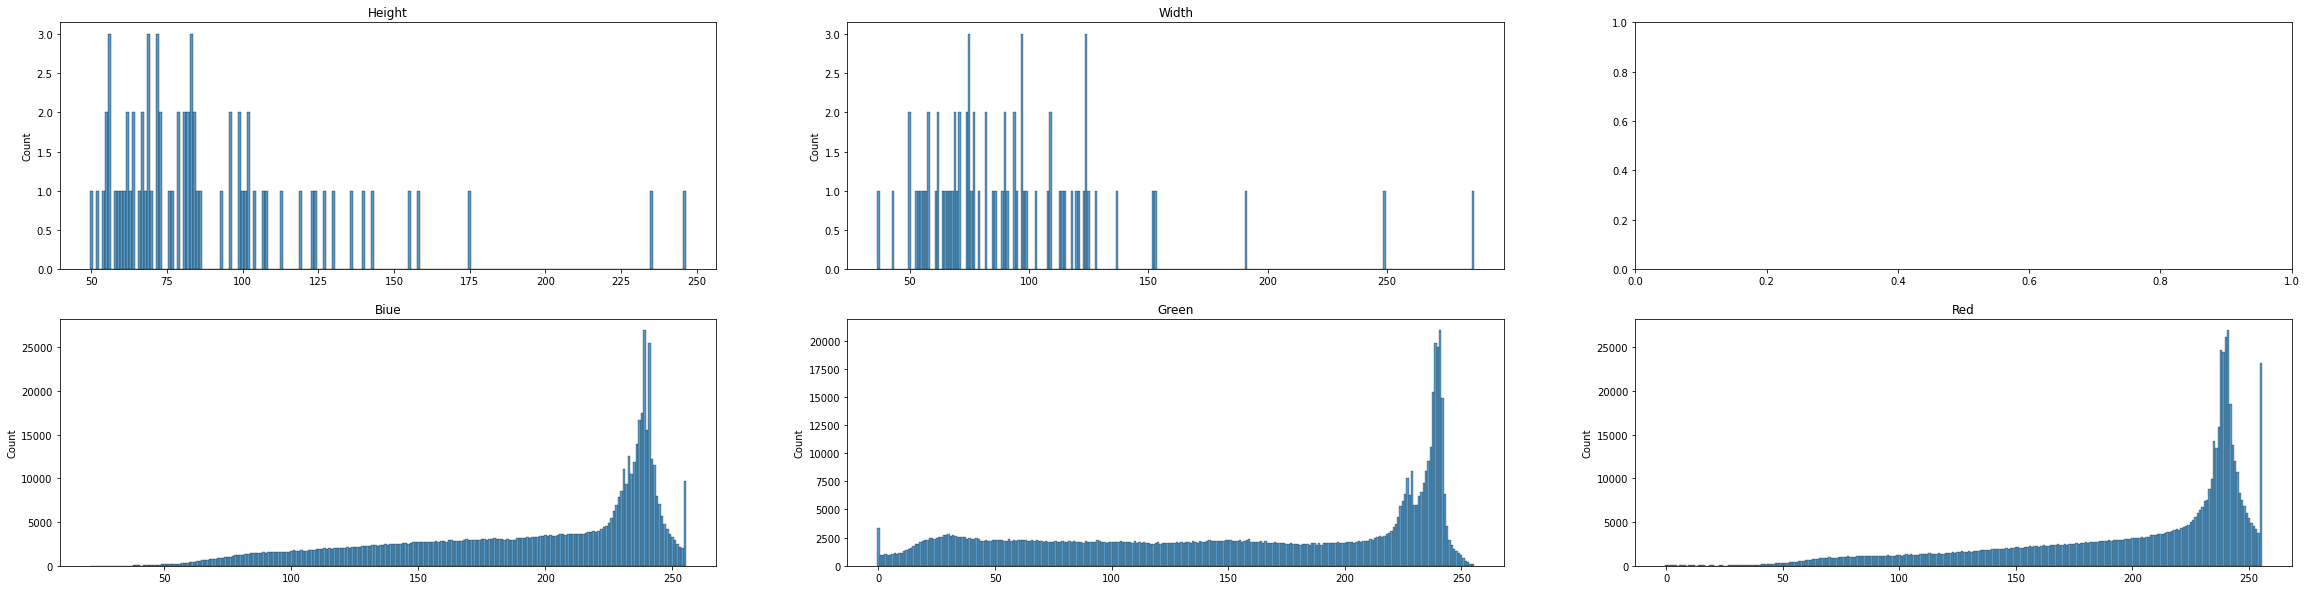

In [ ]:
Statistics_P_not_G_bigger('test_for_label_augmentation')

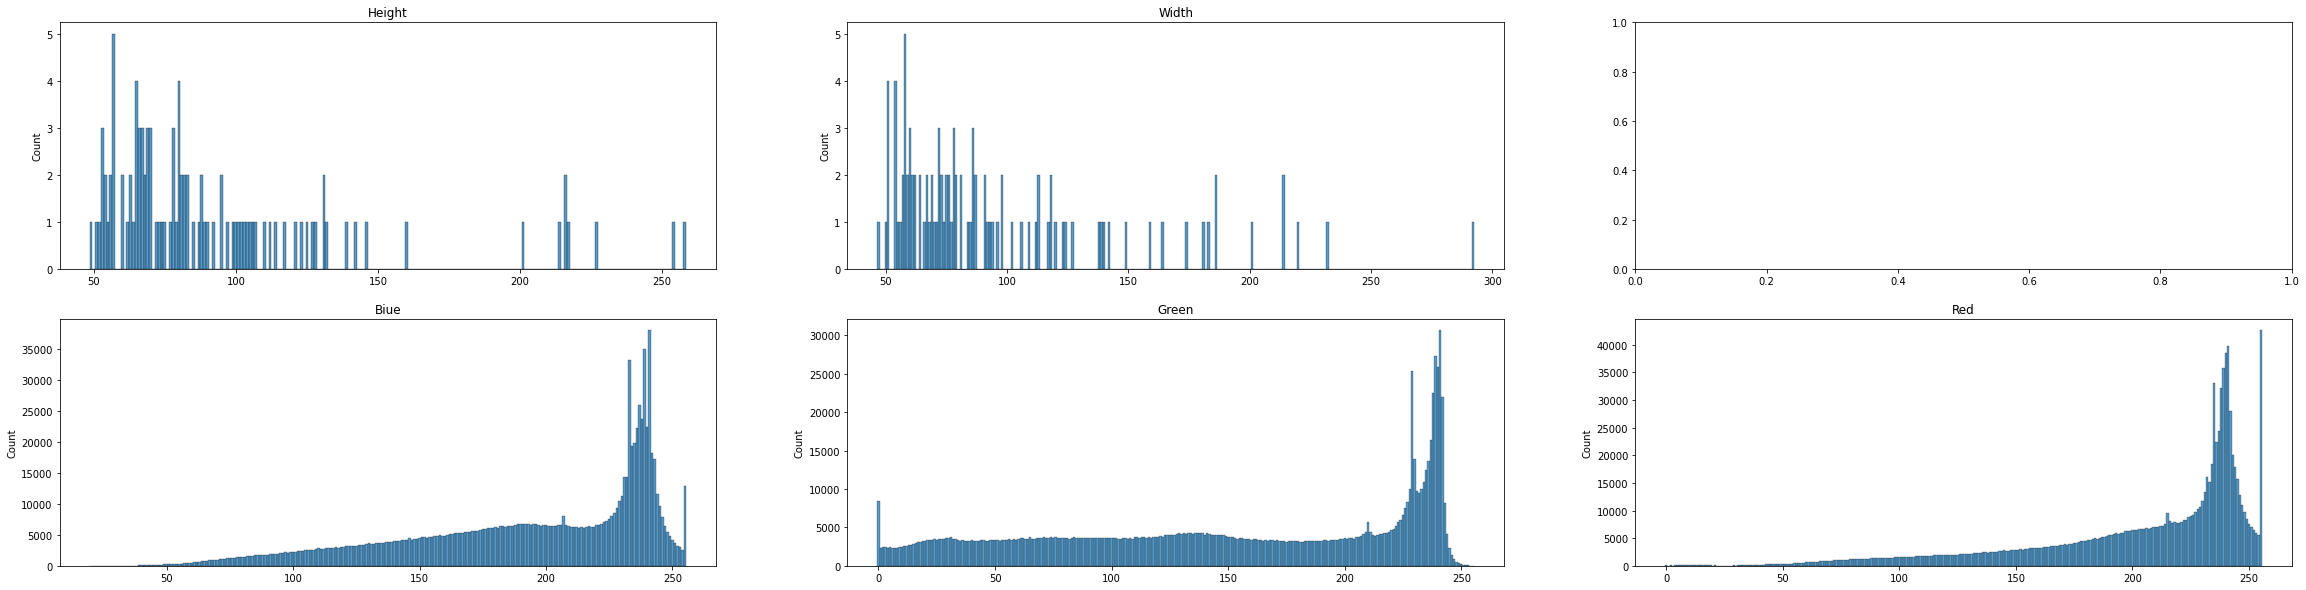

In [ ]:
Statistics_P_not_G_bigger('test_with_background')

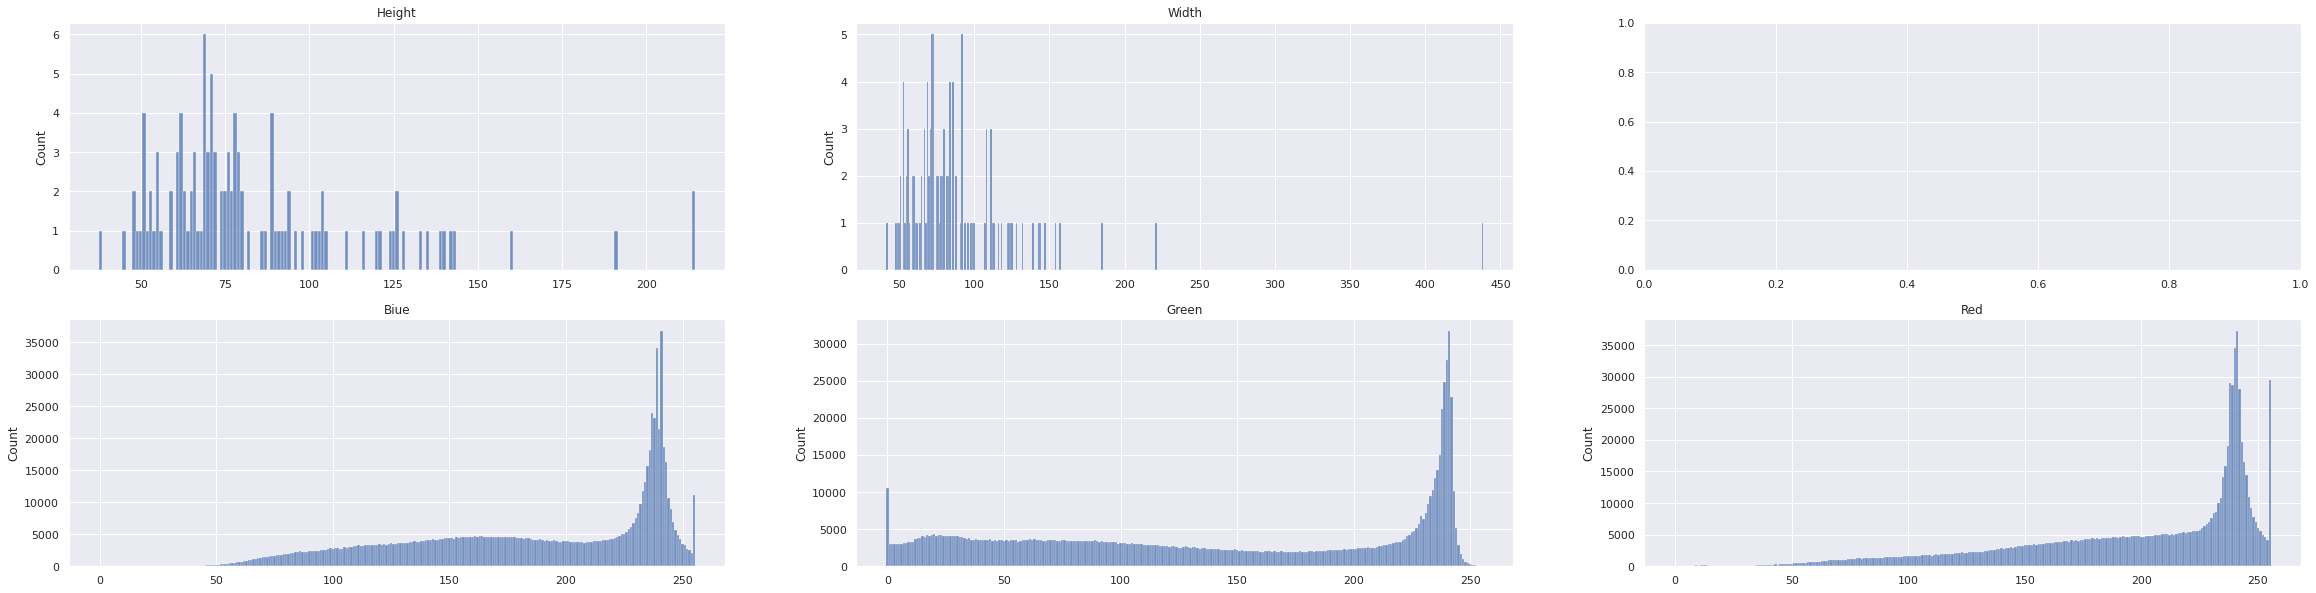

In [ ]:
Statistics_P_not_G_bigger('test_with_background_lr0')

## Statistics for false-negative.
The function anaylize the false-negative images.
1. Height distribution
2. Width distribution
3. BGR color distribution

In [ ]:
def Statistics_G_not_P(test_name):
  HG = []
  WG = []
  B = []
  G = []
  R = []

  num = len(os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P'))

  for i in os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P'):
    img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P/{i}')
    HG.append(img.shape[0])
    WG.append(img.shape[1])
    B.append(img[:,:,0].tolist())
    G.append(img[:,:,1].tolist())
    R.append(img[:,:,2].tolist())

  B = [items for item in B for items in item]
  B = [items for item in B for items in item]
  G = [items for item in G for items in item]
  G = [items for item in G for items in item]
  R = [items for item in R for items in item]
  R = [items for item in R for items in item]

  print(f'The number of G_not_P is {num}')
  fig,axes = plt.subplots(2,3,figsize=(25,10)) 
  sns.histplot(ax = axes[0,0],x=HG,discrete=True).set(title='Height')
  sns.histplot(ax = axes[0,1],x=WG,discrete=True).set(title='Width')
  sns.histplot(ax = axes[1,0],x=B,discrete=True).set(title='Biue')
  sns.histplot(ax = axes[1,1],x=G,discrete=True).set(title='Green')
  sns.histplot(ax = axes[1,2],x=R,discrete=True).set(title='Red')

The number of G_not_P is 25


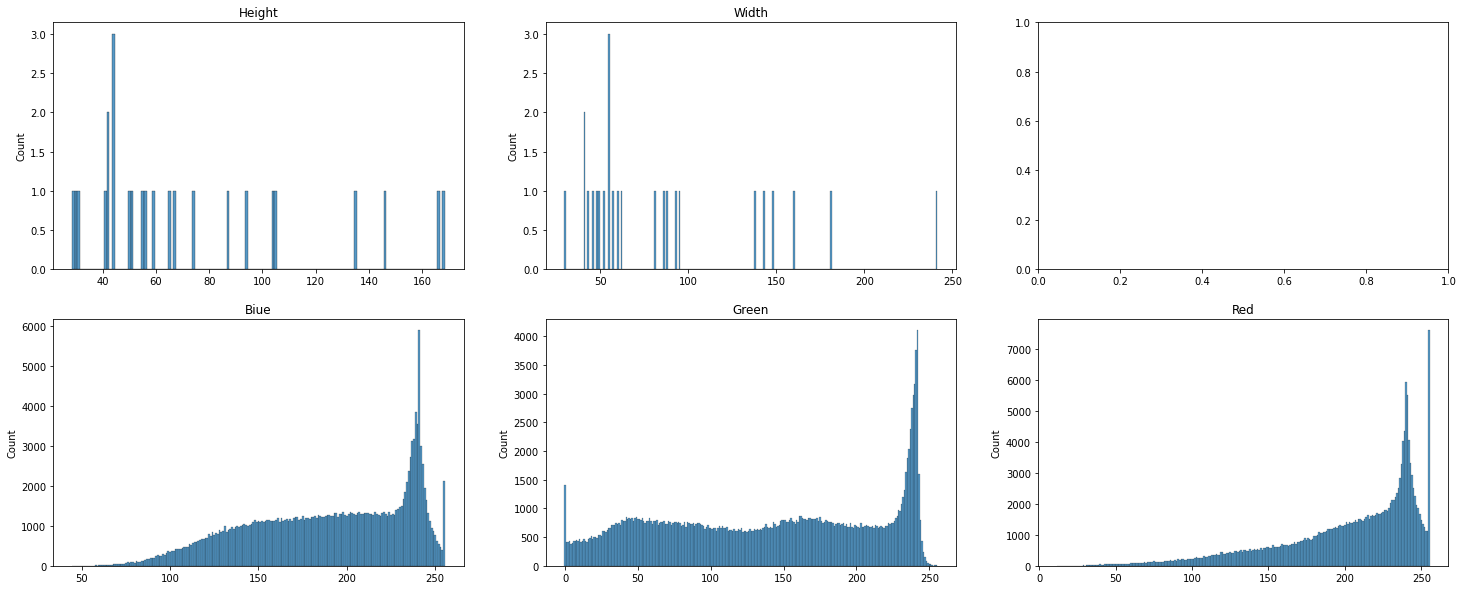

In [ ]:
Statistics_G_not_P('test_for_label')

The number of G_not_P is 13


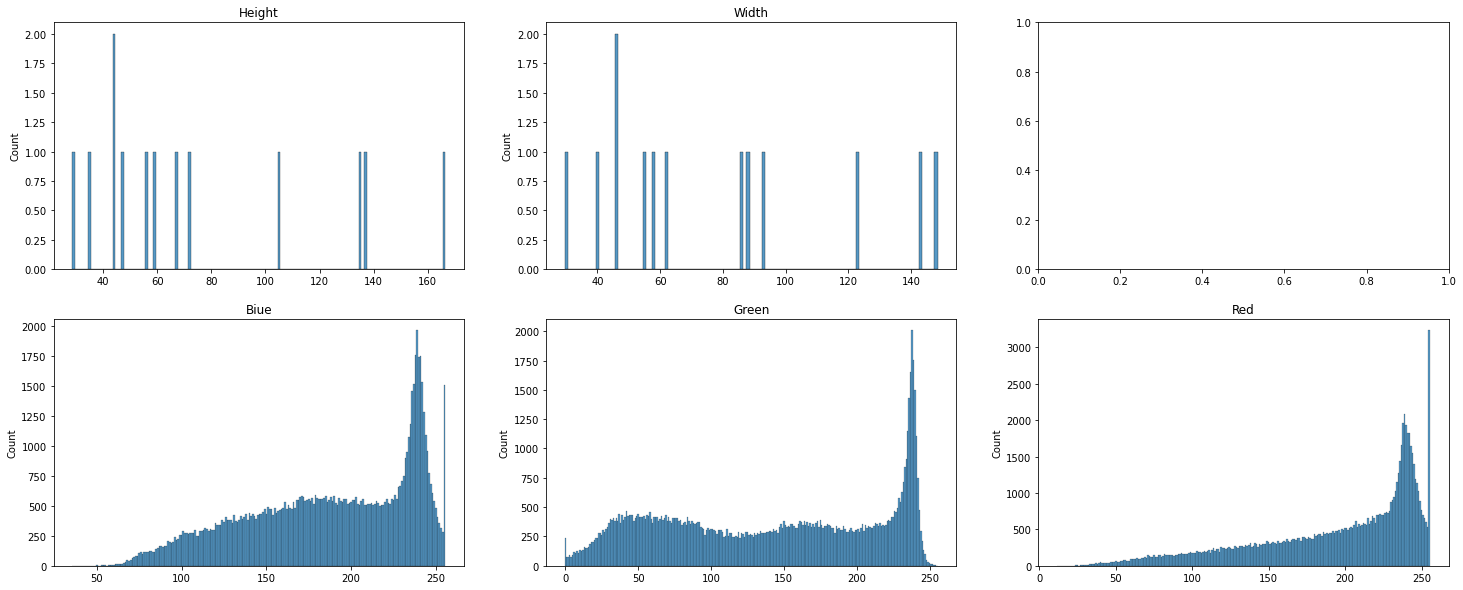

In [ ]:
Statistics_G_not_P('test_for_label_augmentation')

The number of G_not_P is 16


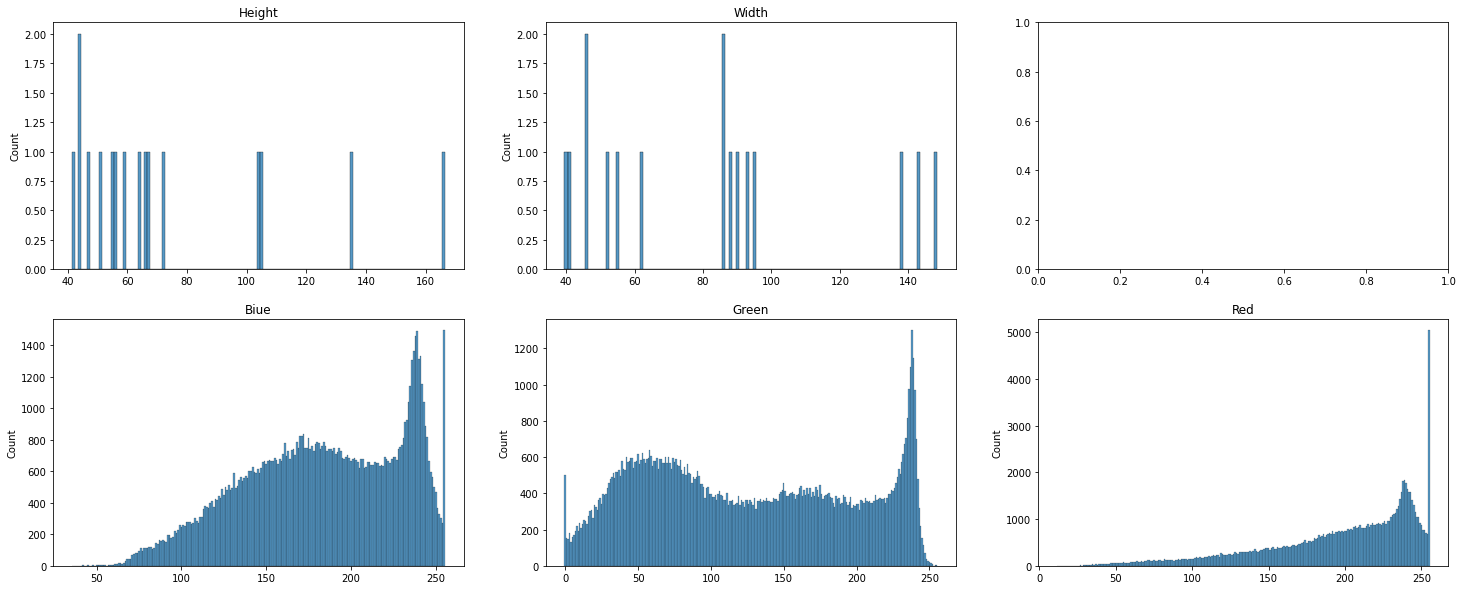

In [ ]:
Statistics_G_not_P('test_with_background')

The number of G_not_P is 15


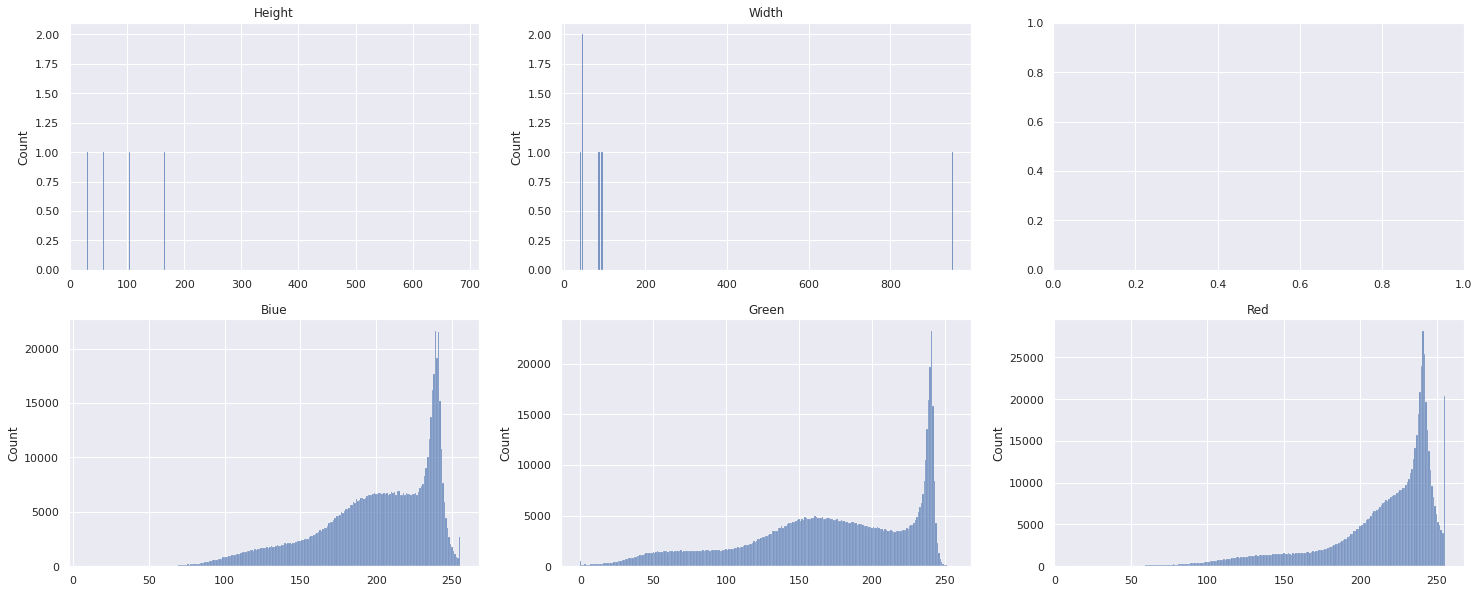

In [ ]:
Statistics_G_not_P('test_with_background_lr0')

## Score's Threshold
The function set the different threshold for score and show the number for false-postivie, false-negative and total false.

In [ ]:
def cou(test_name):

  filename = os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels')
  numlist = []
  for fil in filename:
    name = fil.split('.')
    numlist.append(int(name[0]))

  count_Tlis = []
  count_Plis = []
  count_Glis = []

  for thres in np.arange(0,1,0.05):

    count_P = 0
    count_G = 0

    #for each image
    for n in numlist:
      #open each image's ground true text
      with open(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels/{n:08}.txt','r') as R:
        corlis = []
        #each ground ture for one image
        for line in R.readlines():
          word = line.split(' ')
          xcen = round(float(word[1])*1716)
          ycen = round(float(word[2])*942)
          xminL = round(float(word[1])*1716-float(word[3])*1716/2)
          yminL = round(float(word[2])*942-float(word[4])*942/2)
          xmaxL = round(float(word[1])*1716+float(word[3])*1716/2)
          ymaxL = round(float(word[2])*942+float(word[4])*942/2)
          score = float(word[5])
          #each ground true's coordinate
          cor = [xcen,ycen,xminL,ymaxL,xmaxL,yminL,score]
          corlis.append(cor)

      #open eacn image's prediction result
      with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/labels/val/{n:08}.txt','r') as RL:
        corlisL = []
        #each prediction result for one image
        for line in RL.readlines():
          wordL = line.split(' ')
          xcenL = round(float(wordL[1])*1716)
          ycenL = round(float(wordL[2])*942)
          xminL = round(float(wordL[1])*1716-float(wordL[3])*1716/2)
          yminL = round(float(wordL[2])*942-float(wordL[4])*942/2)
          xmaxL = round(float(wordL[1])*1716+float(wordL[3])*1716/2)
          ymaxL = round(float(wordL[2])*942+float(wordL[4])*942/2)
          #each prediction result's coordinate
          corL = [xcenL,ycenL,xminL,ymaxL,xmaxL,yminL]
          corlisL.append(corL)

      #the bndbox fit the condition in one image
      count = 0
      countL = 0
      for cor in corlis:
        if cor[6]>=thres:
          if not any(corL[2]<=cor[0]<=corL[4] and corL[5]<=cor[1]<=corL[3] for corL in corlisL):
            count += 1
      for corL in corlisL:
          if not any(cor[2]<=corL[0]<=cor[4] and cor[5]<=corL[1]<=cor[3] for cor in corlis if cor[6]>=thres):
            countL += 1

      count_P+=count
      count_G+=countL

    lis = [thres,count_P,count_G,count_P+count_G]
    count_Tlis.append(lis)
  
  countar = np.array(count_Tlis)
  df2 = pd.DataFrame(countar,columns=['threshold','P_not_G','G_not_P','total bndbox number'])
  fig,ax=plt.subplots(figsize=(7,7))
  ax=sns.lineplot(data=df2,x='threshold',y='total bndbox number',marker='o')
  ax1=sns.lineplot(data=df2,x='threshold',y='P_not_G',marker='x')
  ax2=sns.lineplot(data=df2,x='threshold',y='G_not_P',marker='.')  

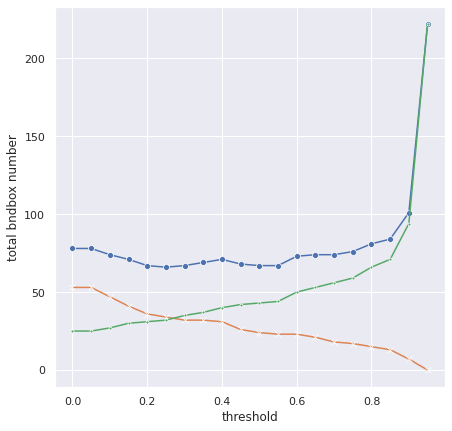

In [ ]:
cou('test_for_label')

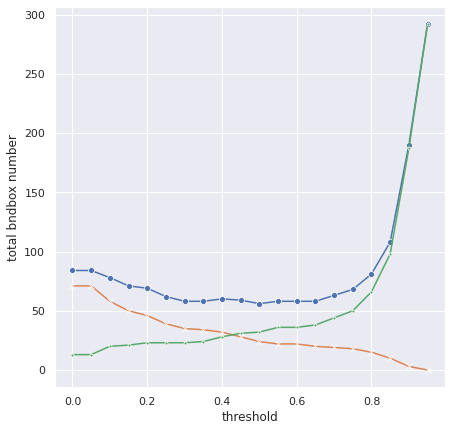

In [ ]:
cou('test_for_label_augmentation')

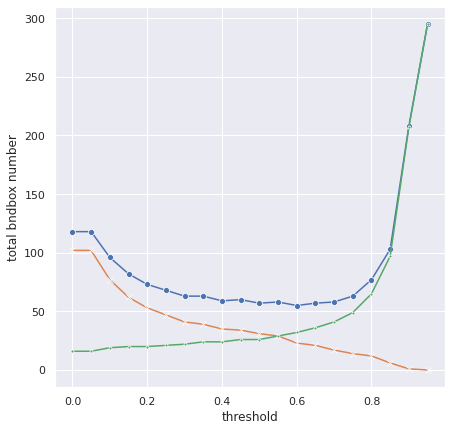

In [ ]:
cou('test_with_background')

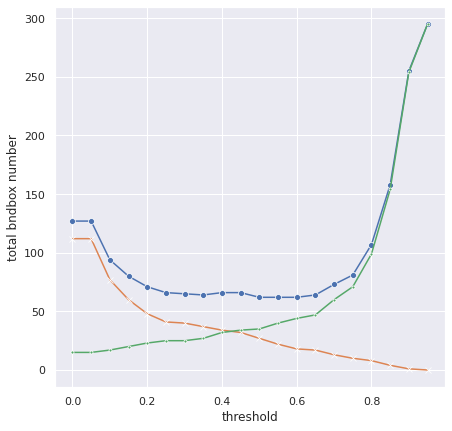

In [ ]:
cou('test_with_background_lr0')